## 01 - Görüntü İşlemenin Temelleri
(Moacir A. Ponti, ICMC/USP, 2021)

Kurs süresince görselleri yüklemek, kaydetmek, göstermek ve işlemek için Python 3 ve bazı temel kütüphaneleri kullanacağız. Bu not defterinde bazı Python temel bilgilerinin yanı sıra aşağıdaki kütüphaneler de gösterilmektedir:

'numpy' sayısal matematik kütüphanesi, çok boyutlu dizilerle çalışmaya izin verir, vektör ve matris için optimize edilmiş operatörler içerir

'imageio' görüntüler için bir giriş/çıkış kitaplığıdır

'matplotlib' görüntüler ve grafikler için bir çizim kütüphanesidir

In [28]:
import numpy as np
import imageio
import matplotlib.pyplot as plt

OBS: 'as' kullanıldığında, kütüphaneye daha kısa bir tanımlayıcı kullanarak erişime izin vermek için bir takma ad oluşturulur. Örneğin, 'numpy'ye 'np' yoluyla erişilebilir.

Kullanabileceğimiz 10 öğeli sıfır değerli bir `A' dizisi oluşturalım:

In [29]:
A = np.zeros(10)

In [30]:
print(A)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Bu diziyi indeksleyebilir ve üzerine değerler yazabiliriz veya yineleyebiliriz.

In [31]:
A[0] = 3

In [32]:
A[5] = 1

In [33]:
print(A)

[3. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


Bunu yinelemek için 'for' ifadesini kullanabiliriz

In [34]:
for element in A:
    print(element)

3.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0


`:` operatörünü kullanarak dizileri dilimlemek ve değerleri tanımlamak da mümkündür.
Örneğin 4. konumdan önceki yani 0'dan 3'e kadar tüm dizi elemanlarına 6 sayısını atayalım:

In [35]:
A[:4] = 6
print(A)

[6. 6. 6. 6. 0. 1. 0. 0. 0. 0.]


Görüntüler diziler gibi ele alınabilir ancak bundan önce onları dizilere yüklememiz gerekiyor!

Klavyeden girdi yakalamak için 'input()' işlevi kullanılabilir. Girişi aldıktan sonra, değeri String, Integer vb. gibi istenen türe dönüştürmek iyidir. Aşağıda iki görüntü dosya adı klavyeden okunur ve değerler dizelere dönüştürülür.

Daha sonra bu tür dosyaları diskten okumak ve belleğe yüklemek için `imageio` kütüphanesi kullanılır.


In [36]:
filename1 = str(input())
filename2 = str(input())

# reading image files
img1 = imageio.imread(filename1) #/content/num1.png
img2 = imageio.imread(filename2) #/content/num2.png

/content/num1.png
/content/num2.png


<ipython-input-36-9b98abf64e16>:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img1 = imageio.imread(filename1) #/content/num1.png
<ipython-input-36-9b98abf64e16>:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img2 = imageio.imread(filename2) #/content/num2.png


'img1' ve 'img2' nesneleri, 'shape' özelliği kullanılarak kontrol edilebilen, belirli bir şekle (boyutlara) sahip dizilerdir.

In [37]:
print(type(img1))
print(img1.shape)
print(img2.shape)


<class 'numpy.ndarray'>
(250, 250, 3)
(250, 250, 3)


Bu tür görüntüleri işleyebilmek için görüntünün boyutlarını bilmek esastır.

Şimdi 'matplotlib' kütüphanesini kullanarak giriş görsellerini gösterelim.
Gri tonlamalı görselleri gösterebilmek için renk haritasını “gri” olarak tanımlıyoruz. Aksi halde ona yanlış renkler atayacaktır.

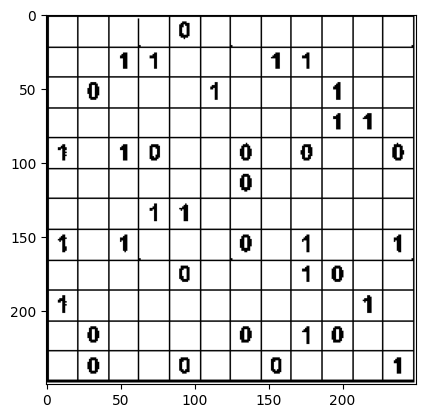

In [38]:
plt.imshow(img1, cmap="gray")

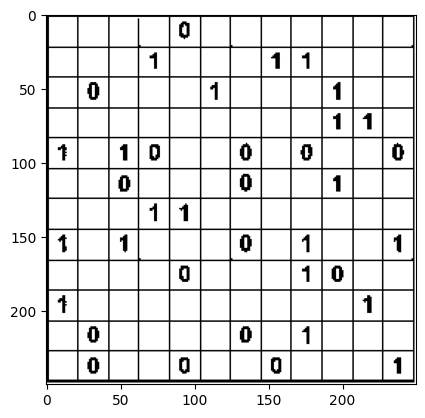

In [39]:
plt.imshow(img2, cmap="gray")

Bu örnekte hangi hücrelerde farklı sayıların olduğunu bulmak için iki görüntü arasındaki farkları tespit edeceğiz.

Bunu yapmanın en basit (ancak en hızlı olmayan) yolu, iki döngü kullanarak tüm pikselleri açıkça gözden geçirmek ve her piksel çiftini çıkarmaktır.

Çıkarma işleminin sonucu sıfırlarla başlayan yeni bir matriste saklanır. Görüntülerin piksel piksel çıkarılmasına izin vermek için her ikisinin de aynı boyutlara sahip olduğundan emin olmamız gerektiğini unutmayın.

In [40]:
size1 = img1.shape
size2 = img2.shape
assert size1 == size2

In [41]:
img_sub = np.zeros(size1, dtype=float)

for x in range(size1[0]):
    for y in range(size1[1]):
       img_sub = img1.astype(float) - img2.astype(float)   #img_sub[x,y] = float(img1[x,y]) - float(img2[x,y])


Ortaya çıkan görüntü 'matplotlib' ile gösterilebilir.

Ayrıca hangi değerlerin farklı gri düzeylerle eşlendiğini incelememiz için renk çubuğunu (sağ tarafta görüntülenen) göstereceğim.

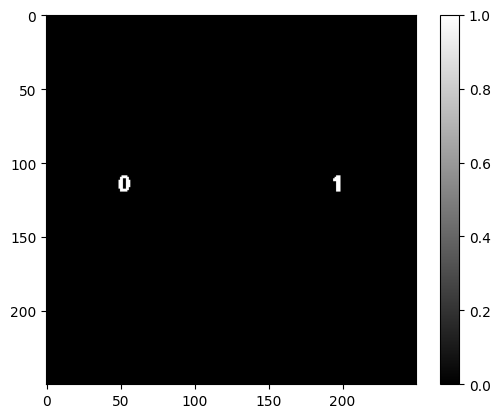

In [42]:
plt.imshow(img_sub, cmap="gray")
plt.colorbar()

Değer aralığının negatiften pozitif değerlere doğru gittiğini unutmayın. Bu değerlerin tam olarak hangileri olduğunu kontrol edelim

In [43]:
print("Min value", np.min(img_sub))
print("Max value", np.max(img_sub))

Min value -255.0
Max value 255.0


Her pikseli 8 bit kullanarak temsil etmek istediğimiz için bu iyi değil. Görüntünün doğru şekilde saklanmasına ve görüntülenmesine izin vermek için görüntüyü [0,255] aralığına normalleştirmemiz gerekir.

Ancak şimdi döngü kullanmak yerine Python'un matrislerin doğrudan aritmetik operatörler kullanılarak işlenmesine izin verdiğini göstereceğim:

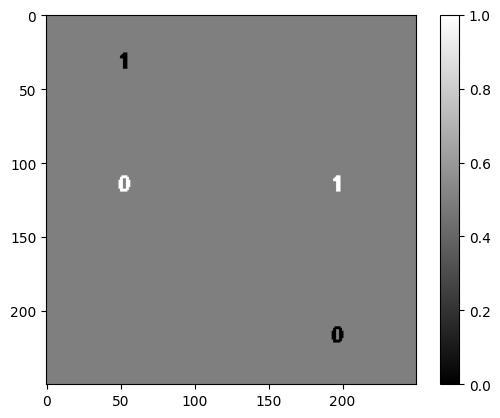

In [44]:
# maksimum ve minimum değerleri al
imax = np.max(img_sub)
imin = np.min(img_sub)

# minimum 0 ve maksimum 1 olacak şekilde görüntüyü normalleştirin
img_sub_norm = (img_sub-imin)/(imax-imin)

plt.imshow(img_sub_norm, cmap="gray")
plt.colorbar()

Renk çubuğunun değiştiğini unutmayın. Artık görüntünün tamamını 255 ile çarpabilir ve ardından 8 bitlik bir gösterime dönüştürebiliriz (8 bitlik işaretsiz int)

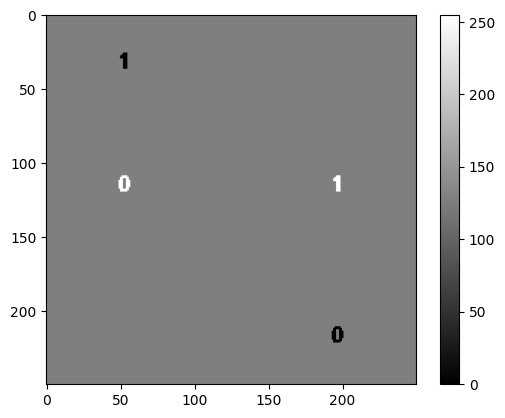

In [45]:
img_sub_norm = (img_sub_norm*255).astype(np.uint8)

plt.imshow(img_sub_norm, cmap="gray")
plt.colorbar()

Son olarak `imageio` kütüphanesini kullanarak imajı diske yazıyoruz:

In [46]:
imageio.imwrite("diff_nums.jpg", img_sub_norm)